# KAPLAN-MEIER

In [7]:
import matplotlib.pyplot as plt
from reliability.Nonparametric import KaplanMeier
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
from reliability.Other_functions import make_right_censored_data

## Example 1

In [3]:
f = [5248, 7454, 16890, 17200, 38700, 45000, 49390, 69040, 72280, 131900]
rc = [3961, 4007, 4734, 6054, 7298, 10190, 23060, 27160, 28690, 37100, 40060, 45670, 53000, 67000, 69630, 77350, 78470, 91680, 105700, 106300, 150400]

Results from KaplanMeier (95% CI):
 Failure times  Censoring code (censored=0)  Items remaining  Kaplan-Meier Estimate  Lower CI bound  Upper CI bound
          3961                            0               31                      1               1               1
          4007                            0               30                      1               1               1
          4734                            0               29                      1               1               1
          5248                            1               28               0.964286        0.895548               1
          6054                            0               27               0.964286        0.895548               1
          7298                            0               26               0.964286        0.895548               1
          7454                            1               25               0.925714        0.826513               1
         10190                       

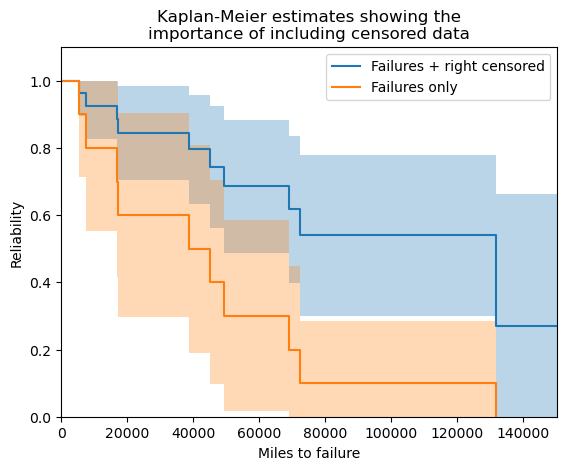

In [6]:
KaplanMeier(
    failures = f, 
    right_censored = rc,
    label = 'Failures + right censored'
)

KaplanMeier(
    failures = f,
    label = 'Failures only'
)

plt.title('Kaplan-Meier estimates showing the\nimportance of including censored data')
plt.xlabel('Miles to failure')
plt.legend()
plt.show()

## Example 2

In [8]:
dist = Weibull_Distribution(alpha = 5, beta = 2)

In [9]:
raw_data = dist.random_samples(100, seed = 2)

In [10]:
data = make_right_censored_data(raw_data, threshold = 9)

In [11]:
wbf = Fit_Weibull_2P(
    failures = data.failures, 
    right_censored = data.right_censored,
    show_probability_plot = False,
    print_results = False
)

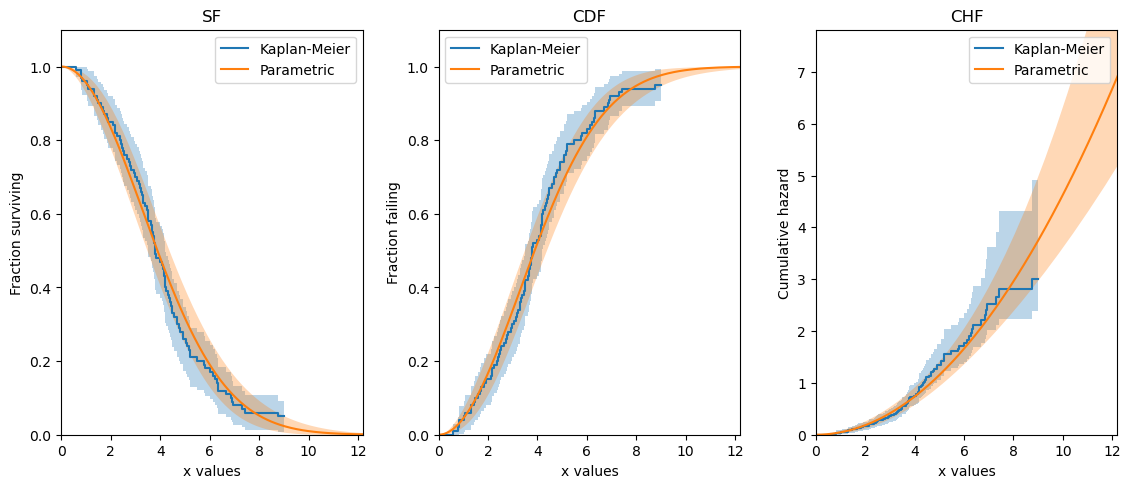

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(131)
KaplanMeier(failures=data.failures, right_censored=data.right_censored, plot_type='SF', print_results=False, label='Kaplan-Meier')
wbf.distribution.SF(label='Parametric')
plt.legend()
plt.title('SF')
plt.subplot(132)
KaplanMeier(failures=data.failures, right_censored=data.right_censored, plot_type='CDF', print_results=False, label='Kaplan-Meier')
wbf.distribution.CDF(label='Parametric')
plt.legend()
plt.title('CDF')
plt.subplot(133)
KaplanMeier(failures=data.failures, right_censored=data.right_censored, plot_type='CHF', print_results=False, label='Kaplan-Meier')
wbf.distribution.CHF(label='Parametric')
plt.legend()
plt.title('CHF')
plt.subplots_adjust(left=0.07, right=0.95, top=0.92, wspace=0.25)  # format the plot layout
plt.show()